# Notebook for finding distribution of HAIL_MAX2D values

### Import necessary libraries- might need stats libraries later

In [48]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.mlab as mlab
import statistics
import matplotlib.patheffects as pe

## Import WRF Midwest files

In [117]:
hist = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/hist_daily_max_hail_inches.nc') #Open hist daily max .nc file saved to /home/scratch directory
mid4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_4p5_daily_max_hail_inches.nc') #Open mid-FUTR 4.5 daily max .nc file saved to /home/scratch directory
mid8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_8p5_daily_max_hail_inches.nc') #Open mid-FUTR 8.5 daily max .nc file saved to /home/scratch directory
end4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_4p5_daily_max_hail_inches.nc') #Open end-FUTR 4.5 daily max .nc file saved to /home/scratch directory
end8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_8p5_daily_max_hail_inches.nc') #Open end-FUTR 8.5 daily max .nc file s

In [118]:
hist #Test print one dataset- make sure daily data are returned

<xarray.Dataset>
Dimensions:     (Time: 5479, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-09-30T12:00:00 ... 2005-09-29T12:0...
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 ...

## Resample by year and take max along 'Time' dimension- provides annual daily max values of HAIL_MAX2D for each grid for each simulation year (16 years)

### NOTE: this provides only one grid value per year- we don't want this

In [ ]:
#hist_annual = hist.groupby('Time.year').max(dim = 'Time') 
#mid4p5_annual = mid4p5.groupby('Time.year').max(dim = 'Time')
#mid8p5_annual = mid8p5.groupby('Time.year').max(dim = 'Time') #Groupby year and sum HAIL_MAX2D values across time dim- take mean to find max value for each grid cell
#end4p5_annual = end4p5.groupby('Time.year').max(dim = 'Time')
#end8p5_annual = end8p5.groupby('Time.year').max(dim = 'Time')

""" #Additional way using xarray resample by simulation year: Sep-Oct
hist_annual = hist.resample(Time='AS-OCT').max(dim = 'Time') 
mid4p5_annual = mid4p5.resample(Time='AS-OCT').max(dim = 'Time')
mid8p5_annual = mid8p5.resample(Time='AS-OCT').max(dim = 'Time') #Groupby year and sum HAIL_MAX2D values across time dim- take max to find max value for each grid cell
end4p5_annual = end4p5.resample(Time='AS-OCT').max(dim = 'Time')
end8p5_annual = end8p5.resample(Time='AS-OCT').max(dim = 'Time')
"""

In [ ]:
#hist_annual.HAIL_MAX2D.shape #Check len, max of one climate epoch- make sure length is correct. Should return 16 years for each climate epoch- (899 x 1399 x 16) values each

### Convert each file to units of in (provided by dataset in m)

In [119]:
hist = hist.HAIL_MAX2D * 39.3701
mid4p5 = mid4p5.HAIL_MAX2D * 39.3701
mid8p5 = mid8p5.HAIL_MAX2D * 39.3701 #Convert to in
end4p5 = end4p5.HAIL_MAX2D * 39.3701
end8p5 = end8p5.HAIL_MAX2D * 39.3701

In [120]:
hist.max() #Print out max value- make sure units are in inches

<xarray.DataArray 'HAIL_MAX2D' ()>
array(2.28225636)

## Convert HAIL_MAX2D data from each climate epoch to a 1D array (change variables to match climate epoch)

In [121]:
hist_1d = hist.values.ravel()
mid4p5_1d = mid4p5.values.ravel()
mid8p5_1d = mid8p5.values.ravel() #Use numpy's ravel method to return a contiguous flattened 1D array
end4p5_1d = end4p5.values.ravel()
end8p5_1d = end8p5.values.ravel()

In [122]:
len(hist_1d) #Check length of 1D array for one climate epoch

6890943779

## Remove all values from arrays ≠ 0

In [123]:
hist_nonzero = hist_1d[hist_1d != 0]
mid4p5_nonzero = mid4p5_1d[mid4p5_1d != 0]
mid8p5_nonzero = mid8p5_1d[mid8p5_1d != 0] #Select all values from climate epoch that are ≠ 0
end4p5_nonzero = end4p5_1d[end4p5_1d != 0] # **These are plotting variables**
end8p5_nonzero = end8p5_1d[end8p5_1d != 0]

In [124]:
len(hist_nonzero)

1759897664

In [126]:
hist_nan = hist_nonzero[np.isfinite(hist_nonzero)]
mid4p5_nan = mid4p5_nonzero[np.isfinite(mid4p5_nonzero)]
mid8p5_nan = mid8p5_nonzero[np.isfinite(mid8p5_nonzero)] #Use numpy function isfinite to remove nan values
end4p5_nan = end4p5_nonzero[np.isfinite(end4p5_nonzero)]
end8p5_nan = end8p5_nonzero[np.isfinite(end8p5_nonzero)]

In [127]:
hist_nan.shape

(1757382262,)

## Use scipy.stats library to create histogram output for each climate epoch. Returns bins specified by user and grid counts per bin

In [128]:
hist_count, hist_bins = scipy.histogram(hist_nan, 20)
mid4p5_count, mid4p5_bins = scipy.histogram(mid4p5_nan, 20)
mid8p5_count, mid8p5_bins = scipy.histogram(mid8p5_nan, 20) #Pass same # of bins to each epoch
end4p5_count, end4p5_bins = scipy.histogram(end4p5_nan, 20)
end8p5_count, end8p5_bins = scipy.histogram(end8p5_nan, 20)

/tmp/ipykernel_50024/2054338145.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_count, hist_bins = scipy.histogram(hist_nan, 20)
/tmp/ipykernel_50024/2054338145.py:2: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid4p5_count, mid4p5_bins = scipy.histogram(mid4p5_nan, 20)
/tmp/ipykernel_50024/2054338145.py:3: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  mid8p5_count, mid8p5_bins = scipy.histogram(mid8p5_nan, 20) #Pass same # of bins to each epoch
/tmp/ipykernel_50024/2054338145.py:4: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  end4p5_count, end4p5_bins = scipy.histogram(end4p5_nan, 20)
/tmp/ipykernel_50024/2054338145.py:5: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciP

#### NOTE: bins sizes will all be the same

In [14]:
hist_count #Test check grid counts for one epoch

array([53961837, 60579766, 38795764, 20482099,  6278293,  1079694,
         100333,     2528,        1])

In [15]:
end8p5_count #Test check grid counts for another epoch

array([55619441, 64030232, 37705634, 23593707,  9349926,  2036101,
         220346,     6907,        5])

In [17]:
hist_check = hist_nonzero_midwest[hist_nonzero_midwest >= 1.5] #Check grid counts that meets certain thresholds
len(hist_check) #Check grid counts

1182556

In [18]:
end8p5_check = end8p5_nonzero_midwest[end8p5_nonzero_midwest >= 1.5] #Check same threshold for different epoch
len(end8p5_check) #Check grid counts

2263359

In [19]:
len(end8p5_check) - len(hist_check) #Find differences between threshold and different climate epochs- **can use this to quantify differences in results section**

1080803

## Plot 1D data as line graphs

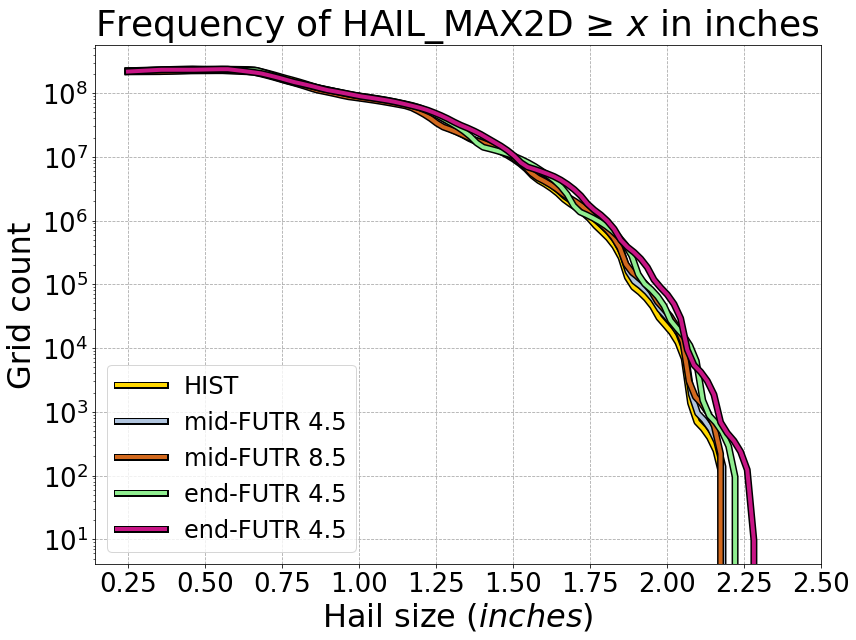

In [130]:
fig, ax = plt.subplots(figsize = (12, 9))
#hist_plt = plt.plot(hist_bins[0:len(hist_bins) -  1], hist_count, color = 'gold', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "HIST")
xnew = np.linspace(hist_nan.min(), hist_nan.max(), 100)
spl = scipy.interpolate.make_interp_spline(hist_bins[0:len(hist_bins) -  1], hist_count, k=1)
y_smooth = spl(xnew)
plt.plot(xnew, y_smooth, color = 'gold', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "HIST")

#mid4p5_plt = plt.plot(mid4p5_bins[0:len(mid4p5_bins) -  1], mid4p5_count, color = 'lightsteelblue', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "mid-FUTR 4.5")
xnew1 = np.linspace(mid4p5_nan.min(), mid4p5_nan.max(), 100)
spl1 = scipy.interpolate.make_interp_spline(mid4p5_bins[0:len(mid4p5_bins) -  1], mid4p5_count, k=1)
y_smooth1 = spl1(xnew1)
plt.plot(xnew1, y_smooth1, color = 'lightsteelblue', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "mid-FUTR 4.5")

#mid8p5_plt = plt.plot(mid8p5_bins[0:len(mid8p5_bins) -  1], mid8p5_count, color = 'chocolate', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "mid-FUTR 8.5")
xnew2 = np.linspace(mid8p5_nan.min(), mid8p5_nan.max(), 100)
spl2 = scipy.interpolate.make_interp_spline(mid8p5_bins[0:len(mid8p5_bins) -  1], mid8p5_count, k=1)
y_smooth2 = spl2(xnew2)
plt.plot(xnew2, y_smooth2, color = 'chocolate', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "mid-FUTR 8.5")

#end4p5_plt = plt.plot(end4p5_bins[0:len(end4p5_bins) -  1], end4p5_count, color = 'lightgreen', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "end-FUTR 4.5")
xnew3 = np.linspace(end4p5_nan.min(), end4p5_nan.max(), 100)
spl3 = scipy.interpolate.make_interp_spline(end4p5_bins[0:len(end4p5_bins) -  1], end4p5_count, k=1)
y_smooth3 = spl3(xnew3)
plt.plot(xnew3, y_smooth3, color = 'lightgreen', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "end-FUTR 4.5")

#end8p5_plt = plt.plot(end8p5_bins[0:len(end8p5_bins) -  1], end8p5_count, color = 'mediumvioletred', linewidth = 3, path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()], label = "end-FUTR 8.5")
xnew4 = np.linspace(end8p5_nan.min(), end8p5_nan.max(), 100)
spl4 = scipy.interpolate.make_interp_spline(end8p5_bins[0:len(end8p5_bins) -  1], end8p5_count, k=1)
y_smooth4 = spl4(xnew4)
plt.plot(xnew4, y_smooth4, color = 'mediumvioletred', linewidth = 4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()], label = "end-FUTR 4.5")

#mid4p5_plt = plt.plot(mid4p5_nonzero, color = 'teal', label = "mid-FUTR 4.5")
#mid8p5_plt = plt.plot(mid8p5_nonzero, color = 'chocolate', label = "mid-FUTR 8.5")
#end4p5_plt = plt.plot(end4p5_nonzero, color = 'seagreen', label = "end-FUTR 4.5")
#end8p5_plt = plt.plot(end8p5_nonzero, color = 'goldenrod', label = "end-FUTR 8.5")
ax.set_yscale('log')
ax.set_yticks([(10**1), (10**2), (10**3), (10**4), (10**5), (10**6), (10**7), (10**8)])
ax.set_xticks([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
plt.grid(color = 'darkgray', linestyle = '--')
ax.set_title('Frequency of HAIL_MAX2D ≥ $x$ in inches', fontsize = 36)
ax.set_xlabel('Hail size ($inches$)', fontsize = 32)
ax.set_ylabel('Grid count', fontsize = 32)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.legend(fontsize=24, loc='lower left')
plt.tight_layout()
plt.savefig('/home/scratch/jgoodin/annual_daily_grid_counts.png')
plt.show()